In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
#notebook 이미지가 별도로 실행됨

from matplotlib import font_manager, rc
from math import sqrt

# 폰트 설정인데 
import matplotlib.font_manager as fm
# font_name = fm.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
# plt.rc('font',family = font_name)
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

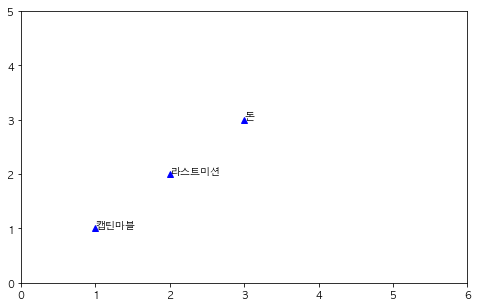

In [19]:
plt.figure(figsize=(8,5)) # 사각형 크기 비율
plt.plot([1,2,3], [1,2,3], 'b^') # plot: 선 그리기, ''에 선 색상을 넣을 수 있음. x리스트, y리스트 색에 ^를 붙이는 것으로 선 대신 점으로 변경
plt.text(1,1,'캡틴마블') # 위치에 글자 표시
plt.text(2,2,'라스트미션')
plt.text(3,3,'돈')
plt.axis([0,6,0,5]) # 가로 세로의 범위 분리 (가로시작, 가로끝, 세로시작, 세로끝)
plt.show()

In [20]:
# 데이터 생성
ratings = {
    'user1': {
        '돈': 2.5,
        '캡틴마블': 3.5,
        '보헤미안 랩소디': 3.0,
        '극한직업': 3.5,
        '이스케이프 룸': 2.5,
        '증인': 3.0,
    },
    'user2': {
        '돈': 1.0,
        '캡틴마블': 4.5,
        '보헤미안 랩소디': 0.5,
        '극한직업': 1.5,
        '이스케이프 룸': 4.5,
        '증인': 5.0,
    },
    'user3': {
        '돈': 3.0,
        '캡틴마블': 3.5,
        '보헤미안 랩소디': 1.5,
        '극한직업': 5.0,
        '증인': 3.0,
        '이스케이프 룸': 3.5,
    },
    'user4': {
        '돈': 2.5,
        '캡틴마블': 3.0,
        '극한직업': 3.5,
        '증인': 4.0,
    },
    'user5': {
        '캡틴마블': 3.5,
        '보헤미안 랩소디': 3.0,
        '증인': 4.5,
        '극한직업': 4.0,
        '이스케이프 룸': 2.5,
    },
    'user6': {
        '돈': 3.0,
        '캡틴마블': 4.0,
        '보헤미안 랩소디': 2.0,
        '극한직업': 3.0,
        '증인': 3.5,
        '이스케이프 룸': 2.0,
    },
    'user7': {
        '돈': 3.0,
        '캡틴마블': 4.0,
        '증인': 3.0,
        '극한직업': 5.0,
        '이스케이프 룸': 3.5,
    },
    'user8': {
        '캡틴마블': 4.5, 
        '이스케이프 룸': 1.0,
        '극한직업': 4.0,
    },
    'user9': {
        '돈': 3.7,
        '캡틴마블': 4.0, 
        '이스케이프 룸': 3.0,
        '극한직업': 4.9,
        '보헤미안 랩소디': 4.1,
    }
}

In [21]:
def draw_chart(data, name1, name2): # 데이터에서 유저 번호 2개를 고르고 그 2개에 대한 그래프 생성
    plt.figure(figsize=(8,5))
    x_ratings = []
    y_ratings = []
    for i in ratings[name1]: # i = 키 값
        if i in data[name2]:
            x_ratings.append(ratings[name1][i])
            y_ratings.append(ratings[name2][i])
            plt.text(ratings[name1][i], ratings[name2][i], i)
    plt.plot(x_ratings, y_ratings, 'g^')
    plt.axis([0,6,0,6])
    plt.xlabel(name1)
    plt.ylabel(name2)
    plt.show()

In [22]:
# 피어슨 상관관계
def pearson_correlation_coefficient(data, name1, name2): # 사용자의 유사도 정보 값 추출 (영화에 대한 평가 점수의 유사도)
    sum_x = 0 # x(name1)의 합
    sum_y = 0 # y(name2)의 합
    sum_pow_x = 0 # x 제곱의 합
    sum_pow_y = 0 # y 제곱의 합
    sum_xy = 0 # x * y 의 합
    count = 0 # 영화의 수
    
    for movie in data[name1]: # movie = key
        if movie in data[name2]: # 같은 영화를 평가
            sum_x += data[name1][movie]
            sum_y += data[name2][movie]
            sum_pow_x += pow(data[name1][movie], 2)
            sum_pow_y += pow(data[name2][movie], 2)
            sum_xy += data[name1][movie] * data[name2][movie]
            count += 1
            
    return (sum_xy - ((sum_x * sum_y) / count)) \
            / sqrt((sum_pow_x - (pow(sum_x, 2) / count)) \
            * (sum_pow_y - (pow(sum_y, 2) / count)))

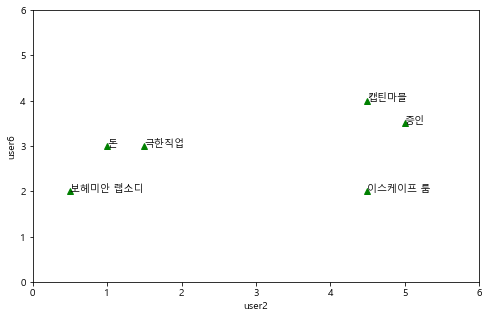

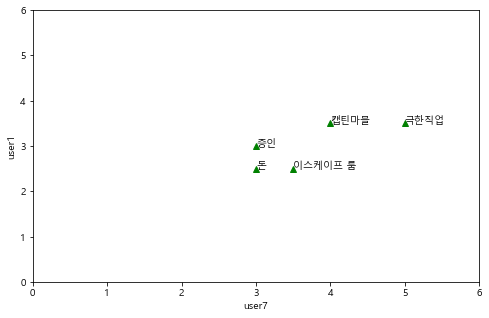

In [13]:
draw_chart(ratings, 'user2', 'user6')
draw_chart(ratings, 'user7', 'user1')

In [6]:
print(pearson_correlation_coefficient(ratings, 'user1', 'user3'))
print(pearson_correlation_coefficient(ratings, 'user5', 'user8'))

0.39605901719066977
0.8934051474415647


In [25]:
user1 = [2.5, 3.5, 3.0, 3.5, 2.5, 3.0]
user3 = [3.0, 3.5, 1.5, 5.0, 3.5, 3.0]
user5 = [3.5, 2.5, 4.0]
user8 = [4.5, 1.0, 4.0]

# 함수를 사용하는 대신 점수가 어느 영화에 대한 것인지 나와 있지 않기 때문에 영화의 순서를 맞춰줘야 한다.
import scipy.stats as stats # pearson 함수를 사용

corr1 = stats.pearsonr(user1, user3)
corr2 = stats.pearsonr(user5, user8)
print(corr1)
print(corr2)

(0.3960590171906697, 0.4369749265426754)
(0.8934051474415642, 0.2966188313316005)


In [1]:
# value 값만
# 돈, 캡틴마블, 보헤미안 랩소디, 극한직업, 이스케이프룸, 증인

# 이거 순서대로 변경 안한거.. 순서 맞춰줘야함
'''user1 = [2.5, 3.5, 3.0, 3.5, 2.5, 3.0]
user2 = [1.0, 4.5, 0.5, 1.5, 4.5, 5.0]
user3 = [3.0, 3.5, 1.5, 5.0, 3.5, 3.0]
user4 = [2.5, 3.0, 3.5, 4.0]
user5 = [3.5, 2.5, 4.0, 3.0, 4.5]
user6 = [3.0, 4.0, 2.0, 3.0, 3.5, 2.0]
user7 = [3.0, 4.0, 3.0, 5.0, 3.5]
user8 = [4.5, 1.0, 4.0]
user9 = [3.7, 4.0, 3.0, 4.9, 4.1]'''

'user1 = [2.5, 3.5, 3.0, 3.5, 2.5, 3.0]\nuser2 = [1.0, 4.5, 0.5, 1.5, 4.5, 5.0]\nuser3 = [3.0, 3.5, 1.5, 5.0, 3.5, 3.0]\nuser4 = [2.5, 3.0, 3.5, 4.0]\nuser5 = [3.5, 2.5, 4.0, 3.0, 4.5]\nuser6 = [3.0, 4.0, 2.0, 3.0, 3.5, 2.0]\nuser7 = [3.0, 4.0, 3.0, 5.0, 3.5]\nuser8 = [4.5, 1.0, 4.0]\nuser9 = [3.7, 4.0, 3.0, 4.9, 4.1]'

In [26]:
# 나와 가장 비슷한 유저가 누구인가 (name)
# 자신과 평점이 비슷한 
def nearest_user(data, name, index=3): # index: 몇 개까지 반환시키는지
    result = []
    # 자신(name)과 가장 가까운 사람의 데이터 출력
    for u in data:
        if u != name:
            result.append((pearson_correlation_coefficient(data, name, u), u))
    result.sort() # 정렬
    result.reverse() # 역순
    return result[:index]

In [17]:
print(pearson_correlation_coefficient(ratings, 'user1', 'user3'))
print(pearson_correlation_coefficient(ratings, 'user5', 'user8'))
print('-' * 20)
print(nearest_user(ratings, 'user8', len(ratings)))
print('-' * 20)

0.39605901719066977
0.8934051474415647
--------------------
[(0.9912407071619299, 'user1'), (0.9244734516419049, 'user6'), (0.8934051474415647, 'user5'), (0.8105674873765092, 'user9'), (0.66284898035987, 'user7'), (0.38124642583151164, 'user3'), (-0.38124642583151164, 'user2'), (-1.0, 'user4')]
--------------------


In [27]:
nearest_user(ratings, 'user9', 5) # 9와 가장 가까운 데이터 5개
# nearest_user(ratings, 'user9', len(ratings)) # 9와 가장 가까운 데이터 본인 제외 수

[(0.9607689228305331, 'user4'),
 (0.9281909617845113, 'user5'),
 (0.8180002591461302, 'user7'),
 (0.8105674873765092, 'user8'),
 (0.7997092494906686, 'user1')]

In [12]:
def getRecommendation(data, user):
    rcmmdList = []
    result = nearest_user(data, user, len(data))
    
    score = 0
    score_dic = {} # 유사도 총합을 위한 dict
    similarity_dic = {} # 평점 총합을 위한 dict
    
    for similarity, name in result:
        if similarity < 0:
            continue
            
        for movie in data[name]:
            if movie not in data[user]: # name이 평가를 내리지 않는 영화(안본 영화)
                score += similarity * data[name][movie] # 영화평점 * 유사도
                score_dic.setdefault(movie,0) # 기본값 설정
                score_dic[movie] += score # 합계 구하기
                
                # 조건에 맞는 사람의 유사도의 누적합 구하기
                similarity_dic.setdefault(movie, 0)
                similarity_dic[movie] += similarity
                
            score = 0 # 영화가 바뀌었으니 초기화
            
    for key in score_dic:
        # 평점 총합 / 유사도 총합
        score_dic[key] = score_dic[key] / similarity_dic[key]
        rcmmdList.append((score_dic[key], key))
        
    rcmmdList.sort()
    rcmmdList.reverse() 
    return rcmmdList

In [22]:
rcmmdList = getRecommendation(ratings, 'user8')
# 영화를 추천해주는 것인데 user1은 모든 영화를 봤으므로 추천 불가능!

In [23]:
print(rcmmdList)
print(rcmmdList[0])

[(3.467750847406967, '증인'), (3.019037058253216, '돈'), (2.848855549166695, '보헤미안 랩소디')]
(3.467750847406967, '증인')


In [26]:
!pip install fbprophet

  Using cached fbprophet-0.7.tar.gz (64 kB)
  Created wheel for fbprophet: filename=fbprophet-0.7-py3-none-any.whl size=523856 sha256=86e2b333de74efd3b64c80a17504574d5efe1654c5ad2c6b062b8e1341cfa691
  Stored in directory: c:\users\shanolulu\appdata\local\pip\cache\wheels\bc\8f\fb\e5a8c432200c02bb37a2166188aae630030146b14908155c13
Successfully built fbprophet
